In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

In [2]:
df=pd.read_csv('Image3.txt')

In [3]:
df.head()

,2.1668,5.4895,1
0,-1.9563,-0.79647,1
1,1.7243,1.35830,1
2,4.5019,6.03320,1
3,0.7053,4.16960,1
4,2.6704,3.85390,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 3 columns):
2.1668    9999 non-null float64
5.4895    9999 non-null float64
1         9999 non-null int64
dtypes: float64(2), int64(1)
memory usage: 234.4 KB


In [5]:
df

,2.1668,5.4895,1
0,-1.956300,-0.796470,1
1,1.724300,1.358300,1
2,4.501900,6.033200,1
3,0.705300,4.169600,1
4,2.670400,3.853900,1
5,1.769200,3.400300,1
6,0.166970,1.272800,1
7,1.036300,2.410200,1
8,1.829600,3.302100,1
9,2.509100,4.633100,1


In [6]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]
#x and y are series not arrays 
#to change the series to arrays = x=[:,np.newaxis]

In [7]:
y
#y is a series

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
9969    2
9970    2
9971    2
9972    2
9973    2
9974    2
9975    2
9976    2
9977    2
9978    2
9979    2
9980    2
9981    2
9982    2
9983    2
9984    2
9985    2
9986    2
9987    2
9988    2
9989    2
9990    2
9991    2
9992    2
9993    2
9994    2
9995    2
9996    2
9997    2
9998    2
Name: 1, Length: 9999, dtype: int64

In [8]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2:].values
#to directly get the x and y arrays 


In [9]:
y

array([[1],
       [1],
       [1],
       ...,
       [2],
       [2],
       [2]])

In [10]:
#to change y into horizontal array => 
y=df.iloc[:,-1].values
#or use y=y.ravel()

In [11]:
y

array([1, 1, 1, ..., 2, 2, 2])

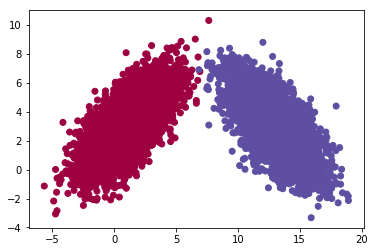

In [12]:

plt.scatter(X[:,0] , X[:,1] ,c=y , cmap = plt.cm.Spectral )
plt.show()

In [13]:
clf=sklearn.linear_model.LogisticRegressionCV()
#clf.fit(X,y)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [16]:
clf.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [17]:
clf.score(X_test,y_test)

1.0

In [18]:
#helper function to plot a decision boundary
def plot_decision_boundary(pred_func):
    #set min and max values and give it some padding 
    x_min,x_max = X[:,0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h betweeen them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max, h))
    #Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #plot the contour and training examples
    plt.contour(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    

    

Text(0.5,1,'Logistic Regression')

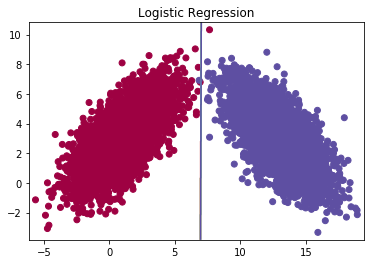

In [19]:
#plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [29]:
num_examples = len(X) 
nn_input_dim = 2 
nn_output_dim = 2


epsilon = 0.01 
reg_lambda = 0.01 

In [30]:
num_examples

9999

In [31]:
y.shape

(9999,)

In [32]:
y1=y>1
y=y1.astype(int)

In [33]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W3) + b3
    exp_scores = np.exp(z3)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/3 * (np.sum(np.square(W1)) +np.sum(np.square(W2))+ np.sum(np.square(W3)))
    return 1./num_examples * data_loss

In [34]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'], model['b3']
    # Forward propagation
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    a2 = np.tanh(z2)
    z3 = a2.dot(W3) + b3
    exp_scores = np.exp(z3)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)


In [36]:
# This function learns parameters for the neural network and returns the model.
# - n_hd: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(n_hd, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, n_hd) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, n_hd))
    W2 = np.random.randn(n_hd, n_hd) / np.sqrt(n_hd)
    b2 = np.zeros((1, n_hd))
    W3 = np.random.randn(n_hd, nn_output_dim) / np.sqrt(n_hd)
    b3 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        a2 = np.tanh(z2)
        z3 = a2.dot(W3) + b3
        exp_scores = np.exp(z3)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW3 = (a2.T).dot(delta3)
        db3 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W3.T) * (1 - np.power(a2, 2))
        dW2 = (a1.T).dot(delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        delta1 = delta2.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW3 += reg_lambda * W3
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        W3 += -epsilon * dW3
        b3 += -epsilon * db3
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

In [37]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

Loss after iteration 0: 0.001551
Loss after iteration 1000: 0.001270
Loss after iteration 2000: 0.001039
Loss after iteration 3000: 0.000851
Loss after iteration 4000: 0.000697
Loss after iteration 5000: 0.000570
Loss after iteration 6000: 0.000467
Loss after iteration 7000: 0.000382
Loss after iteration 8000: 0.000313
Loss after iteration 9000: 0.000256
Loss after iteration 10000: 0.000210
Loss after iteration 11000: 0.000172
Loss after iteration 12000: 0.000141
Loss after iteration 13000: 0.000115
Loss after iteration 14000: 0.000094
Loss after iteration 15000: 0.000077
Loss after iteration 16000: 0.000063
Loss after iteration 17000: 0.000052
Loss after iteration 18000: 0.000042
Loss after iteration 19000: 0.000035


ValueError: cannot reshape array of size 9999 into shape (1466,2557)